In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatch
from matplotlib.gridspec import GridSpec
from matplotlib.patches import FancyBboxPatch

import os
import re
import sys
import datetime
import apertium
from googletrans import Translator, LANGCODES
from hebrew import Hebrew
from skimage.io import imread


sys.path.append('../scripts/python_scripts/')
sys.path.append('../scripts/ML_duolingo')


In [5]:
path_lip = '/Users/pabloherrero/Documents/ManHatTan/data/processed/LIPSTICK/hebrew_db.lip'
lip = pd.read_csv(path_lip)

In [15]:
def show_pkm(nid):
    # nid = 94
    # nid = np.random.randint(900)
    print('NID: ', nid)
    impath = PATH_ANIM+str(nid).zfill(3)+'.png'
    anim = imread(impath)
    nframe = 3
    frame = anim[:, anim.shape[0] * nframe: anim.shape[0] * (nframe+1) , :]

    return frame

# Add n_id column to LIPSTICK

In [490]:
lip['n_id'] = lip.index
lip.head()

,p_recall,n_id,timestamp,delta,user_id,learning_language,ui_language,word_ll,word_ul,lexeme_string,...,p_pred,mdt_history,mdt_correct,mrt_history,mrt_correct,wdt_history,wdt_correct,wrt_history,wrt_correct,speed
0,0.0,0,1736957029,0,pablo,iw,en,להשתמש,to use,lernt/lernen<vblex><pri><p3><sg>,...,NaN,0,0,0,0,0,0,0,0,0.0
1,0.0,1,1736957029,0,pablo,iw,en,רשימה,list,lernt/lernen<vblex><pri><p3><sg>,...,NaN,0,0,0,0,0,0,0,0,0.0
2,0.0,2,1736957029,0,pablo,iw,en,קבוצה,group,lernt/lernen<vblex><pri><p3><sg>,...,NaN,0,0,0,0,0,0,0,0,0.0
3,0.0,3,1736957029,0,pablo,iw,en,להבריש,brush,lernt/lernen<vblex><pri><p3><sg>,...,NaN,0,0,0,0,0,0,0,0,0.0
4,0.0,4,1736957029,0,pablo,iw,en,מערכת יחסים,relationship,lernt/lernen<vblex><pri><p3><sg>,...,NaN,0,0,0,0,0,0,0,0,0.0


In [17]:
new_lip = lip[['p_recall', 'n_id', 'timestamp', 'delta', 'user_id', 'learning_language',
       'ui_language', 'word_ll', 'word_ul', 'lexeme_string', 'history_seen',
       'history_correct', 'session_seen', 'session_correct', 'p_pred',
       'mdt_history', 'mdt_correct', 'mrt_history', 'mrt_correct',
       'wdt_history', 'wdt_correct', 'wrt_history', 'wrt_correct']]
new_lip
new_lip.head()
new_lip.to_csv(path_lip, index=False)


# Set fixed pokemon animation based on n_id

In [14]:
PATH_ANIM = '/Users/pabloherrero/Documents/ManHatTan/gui/Graphics/Battlers/'

In [454]:
path_lip = '/Users/pabloherrero/Documents/ManHatTan/data/processed/LIPSTICK/hebrew_db.lip'
lip = pd.read_csv(path_lip)
lip['n_id'].head()

0    0.0
1    5.0
2    6.0
3    7.0
4    7.0
Name: n_id, dtype: float64

## Show pseudo-random image 

(fixed number of posibilities = len(lip))

NID:  186


(-0.5, 78.5, 78.5, -0.5)

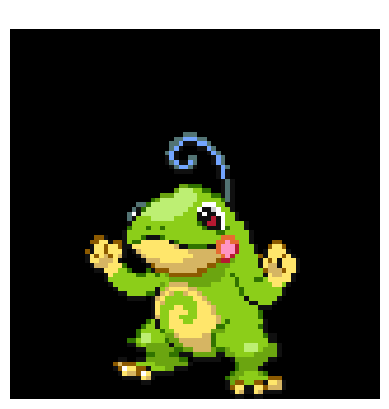

In [484]:
random_nid = np.random.randint(len(lip['n_id']))

img = show_pkm(random_nid)
plt.imshow(img)
plt.title('Slowpoke', color='White')
plt.axis('off')

## Show fixed pokemon for fixed word

NID:  4


(-0.5, 79.5, 79.5, -0.5)

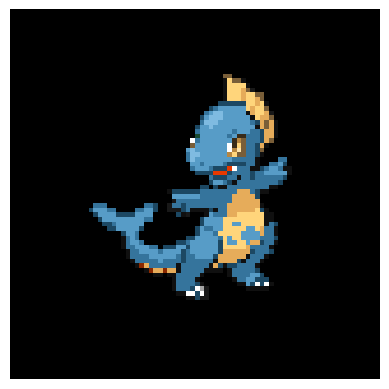

In [79]:
test_entry = lip.loc[lip['word_ul'] =='fear']

img = show_pkm(test_entry['n_id'].values[0])
plt.imshow(img)
plt.axis('off')

# Load pkmn stats

In [494]:
lip.speed

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
221    0.0
222    0.0
223    0.0
224    0.0
225    0.0
Name: speed, Length: 226, dtype: float64

In [43]:
def load_pkmn_stats(lipstick, nid):
    
    qentry = lipstick.loc[nid].copy()

    dict_stats = {'mrt': 'Attack',
                'mdt': 'Defense', 
                'wrt': 'Sp. Attack',
                'wdt': 'Sp. Defense',
                }
    entry_stats = {}
    entry_stats['Speed'] = qentry['speed'] * 10 + 5
    for k, v in dict_stats.items():
        entry_stats[v] = (0.5 + qentry[k+'_correct'] ) / (1 + qentry[k+'_history']) * 10

    entry_stats['hp'] = qentry['p_recall'] / 100 + 0.09
    entry_stats['level'] = qentry['history_correct'] + 10
    return entry_stats


In [44]:

entry_stats = load_pkmn_stats(lip, 5)

## Plot stats

In [7]:
def plot_combat_stats(entry_stats, ax = None):
    positions = [(0.25, 0.6), (0.5, 0.6),  (0.75, 0.6), (0.375, 0.3), (0.625, 0.3) ]
    fig = plt.gcf()
    colors = ['gold', 'maroon', 'magenta', 'navy', 'darkorange',]
    for i, ((x, y), (k, v) )in enumerate(zip(positions, entry_stats.items()) ):
        print(k, v)
        ax = fig.add_axes([x - 0.1, y - 0.1, 0.2, 0.2])  # [x, y, width, height]
        ax.pie([v, 10-v], wedgeprops=dict(width=0.5), startangle=270, colors=[colors[i], '0.9'])
        ax.set_xlabel(k, fontsize=20)

In [38]:
def draw_rounded_bar(ax, width, color, y_offset=0.25, bar_height=0.5, corner_radius=0.07):
    """
    Draws a health bar with rounded corners.
    
    Args:
        ax: The matplotlib axis to draw the bar on.
        width (float): The width of the bar (0 to 1).
        color (str): The color of the bar.
        y_offset (float): The vertical offset for the bar (default is 0.25).
        bar_height (float): The height of the bar (default is 0.5).
        corner_radius (float): The corner radius for the bar (default is 0.07).
    """
    # Create a fancy box with rounded corners
    p_fancy = FancyBboxPatch((0.1, y_offset),  # Start position
                              width,           # Width of the bar
                              bar_height,      # Height of the bar
                              boxstyle=f"round,pad={corner_radius}",
                              fc=color,        # Face color
                              ec=(0, 0, 0))    # Edge color
    ax.add_patch(p_fancy)



def draw_health_bar(entry_stats, ax):
    hp = entry_stats['hp']
    level = entry_stats['level']
    draw_rounded_bar(ax, width=0.8, color='lightgray', y_offset=0.05, bar_height=0.3)
    draw_rounded_bar(ax, width=hp * 0.8, color='green', y_offset=0.05, bar_height=0.3)
    ax.text(0.5, -0.2, f'HP = {int(hp * 100)}/100       Level: {level}/100', size=20, ha='center', va='center', color='yellow', transform=ax.transAxes)
    # Hide the axis
    ax.axis('off')

In [41]:

def plot_combat_stats(entry_stats, ax = None):
    
    positions = [(0.125, 0.8), (0.25, 0.8), (0.375, 0.8), (0.175, 0.55), (0.325, 0.55)]
    fig = plt.figure(figsize=(12, 8))
    fig.patch.set_facecolor("black")
    gs = GridSpec(3, 4, width_ratios=[0.3, 0.3, 0.3, 0.9], height_ratios=[2, 1, 1])

    colors = ['gold', 'maroon', 'magenta', 'navy', 'darkorange']
    
    for i, ((x, y), (k, v) )in enumerate(zip(positions, entry_stats.items()) ):
        print(k, v)
        ax = fig.add_axes([x - 0.1, y - 0.1, 0.2, 0.2])  # [x, y, width, height]
        ax.pie([v, 10-v], wedgeprops=dict(width=0.5), startangle=270, colors=[colors[i], '0.9'])
        ax.set_xlabel(k, fontsize=12)
        ax.xaxis.label.set_color('yellow')

    health_ax = fig.add_subplot(gs[1, :2])  # Spans the second row, columns 2-3
    axim = fig.add_subplot(gs[:, 3])         # Spans all rows, last column

    health_ax.set_xlim(0, 1)
    health_ax.set_ylim(0, 1)

    draw_health_bar(entry_stats, health_ax)
    random_nid = np.random.randint(len(lip['n_id']))

    img = show_pkm(random_nid)
    axim.imshow(img)
    # for ax in axes + [health_ax, axim]:
        # ax.set_facecolor("black")

    # axim.axis('off')
    plt.subplots_adjust(hspace=0.)

Speed 7.417999999999999
Attack 8.333333333333334
Defense 7.5
Sp. Attack 5.0
Sp. Defense 8.333333333333334
NID:  38


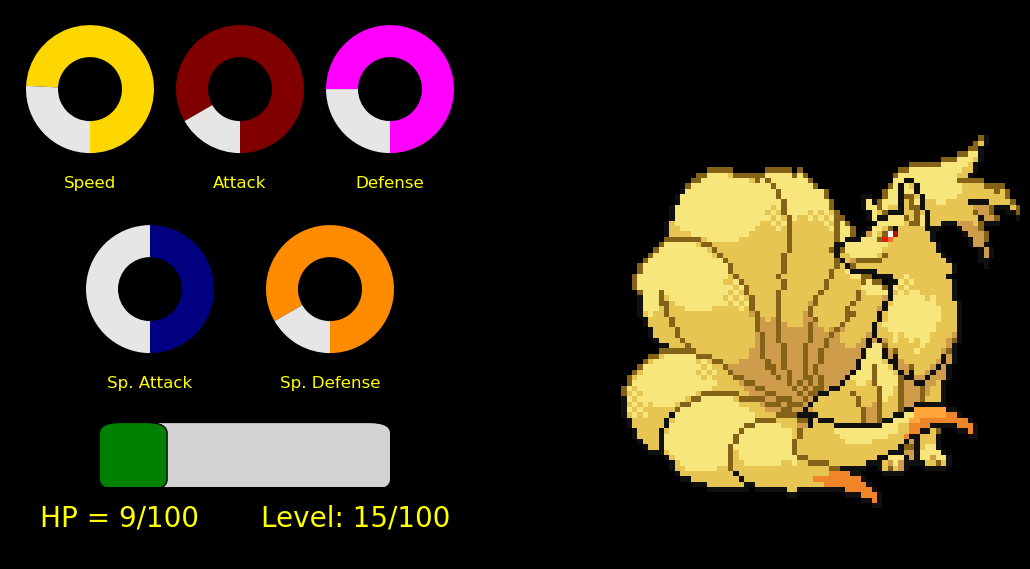

In [45]:
plot_combat_stats(entry_stats)

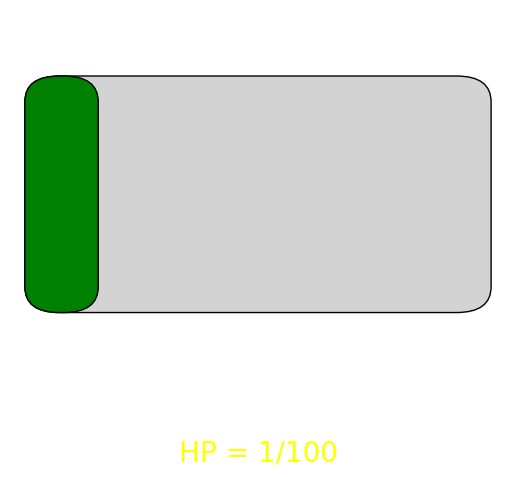

In [688]:
draw_health_bar(0.01, plt.gca())

In [689]:
def plot_stats(entry_stats, hp):
    fig = plt.figure(figsize=(12, 6))
    gs = GridSpec(2, 5, width_ratios=[1, 1, 1, 1, 2], height_ratios=[2, 1])

    axes = [fig.add_subplot(gs[0, i]) for i in range(4)]
    health_ax = fig.add_subplot(gs[1, :4])  # Span all 4 columns in the second row
    axim = fig.add_subplot(gs[:, 4])

    plot_combat_stats(entry_stats, axes)

    # Create the bottom subplot for the health bar
    health_ax.set_xlim(0, 1)
    health_ax.set_ylim(0, 1)

    draw_health_bar(hp, health_ax)
    random_nid = np.random.randint(len(lip['n_id']))

    img = show_pkm(random_nid)
    axim.imshow(img)
    for ax in axes + [health_ax, axim]:
        ax.set_facecolor("black")

    plt.axis('off')
    plt.subplots_adjust(hspace=0.)

    return fig


Speed 5.0
Attack 5.0
Defense 5.0
Sp. Attack 5.0
Sp. Defense 5.0
NID:  20
NID:  67


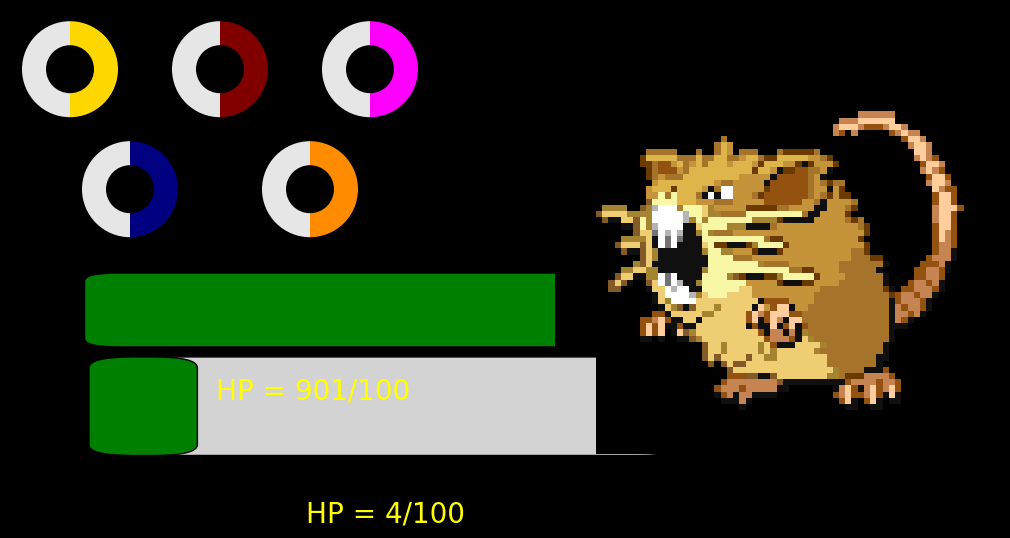

In [690]:
plot_stats(entry_stats, hp = 0.04);

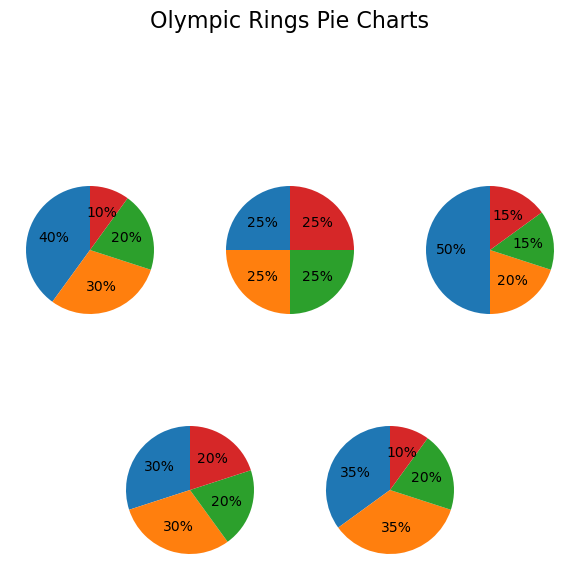

In [483]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the pie charts
data = [
    [40, 30, 20, 10],  # Pie 1
    [25, 25, 25, 25],  # Pie 2
    [50, 20, 15, 15],  # Pie 3
    [30, 30, 20, 20],  # Pie 4
    [35, 35, 20, 10],  # Pie 5
]

# Positions for the subplots
positions = [
    (0.25, 0.6),  # Top-left
    (0.5, 0.6),   # Top-center
    (0.75, 0.6),  # Top-right
    (0.375, 0.3), # Bottom-left
    (0.625, 0.3), # Bottom-right
]

# Create the figure
fig = plt.figure(figsize=(8, 8))

# Create pie plots at custom positions
for i, (x, y) in enumerate(positions):
    ax = fig.add_axes([x - 0.1, y - 0.1, 0.2, 0.2])  # [x, y, width, height]
    ax.pie(data[i], labels=None, autopct='%1.0f%%', startangle=90)

# Add a title
plt.suptitle('Olympic Rings Pie Charts', fontsize=16, y=0.9)

# Show the plot
plt.show()


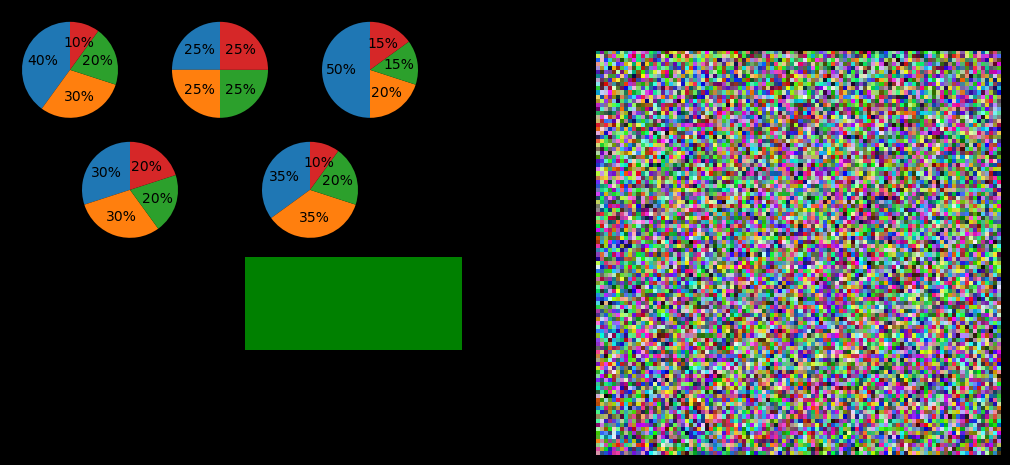

In [654]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Example data for the pie charts
data = [
    [40, 30, 20, 10],  # Pie 1
    [25, 25, 25, 25],  # Pie 2
    [50, 20, 15, 15],  # Pie 3
    [30, 30, 20, 20],  # Pie 4
    [35, 35, 20, 10],  # Pie 5
]

# Create the figure
fig = plt.figure(figsize=(12, 6))  # Adjusted for larger layout
fig.patch.set_facecolor("black")

# Define the GridSpec with 3 rows and 4 columns
gs = GridSpec(3, 4, width_ratios=[0.3, 0.3, 0.3, 0.9], height_ratios=[2, 1, 1])

# Define positions for the pie charts (normalized coordinates in the figure)
positions = [
    (0.125, 0.8),  # First pie
    (0.25, 0.8),   # Second pie
    (0.375, 0.8),  # Third pie
    (0.175, 0.6), # Fourth pie
    (0.325, 0.6), # Fifth pie
]

# Plot the pie charts at the specified positions
for i, (x, y) in enumerate(positions):
    ax = fig.add_axes([x - 0.1, y - 0.1, 0.2, 0.2])  # [x, y, width, height]
    ax.pie(data[i], labels=None, autopct='%1.0f%%', startangle=90)
    ax.set_aspect('equal')  # Keep pies circular

# Add health bar and image axes
health_ax = fig.add_subplot(gs[1, 1:3])  # Spans the second row, columns 2-3
axim = fig.add_subplot(gs[:, 3])         # Spans all rows, last column

draw_health_bar(0.7, health_ax)  # Example health bar with 70% health

# Example placeholder for an image
img = show_pkm()
axim.imshow(img)
axim.axis('off')  # Hide axis for the image

# Show the plot
plt.show()


# Show current team window:

In [20]:
teampath = '/Users/pabloherrero/Documents/ManHatTan/data/processed/LIPSTICK/hebrew_db_team.lip'
team = pd.read_csv(teampath)
nids = team.n_id.values

In [21]:
nids

array([338, 128, 287, 491, 109, 371])

In [ ]:
def draw_health_bar(entry_stats, ax):
    hp = entry_stats['hp']
    level = entry_stats['level']
    draw_rounded_bar(ax, width=0.8, color='lightgray', y_offset=0.05, bar_height=0.3)
    draw_rounded_bar(ax, width=hp * 0.8, color='green', y_offset=0.05, bar_height=0.3)
    ax.text(0.5, -0.2, f'HP = {int(hp * 100)}/100       Level: {level}/100', size=20, ha='center', va='center', color='yellow', transform=ax.transAxes)
    # Hide the axis
    ax.axis('off')

In [73]:
np.arange(6) // 2

array([0, 0, 1, 1, 2, 2])

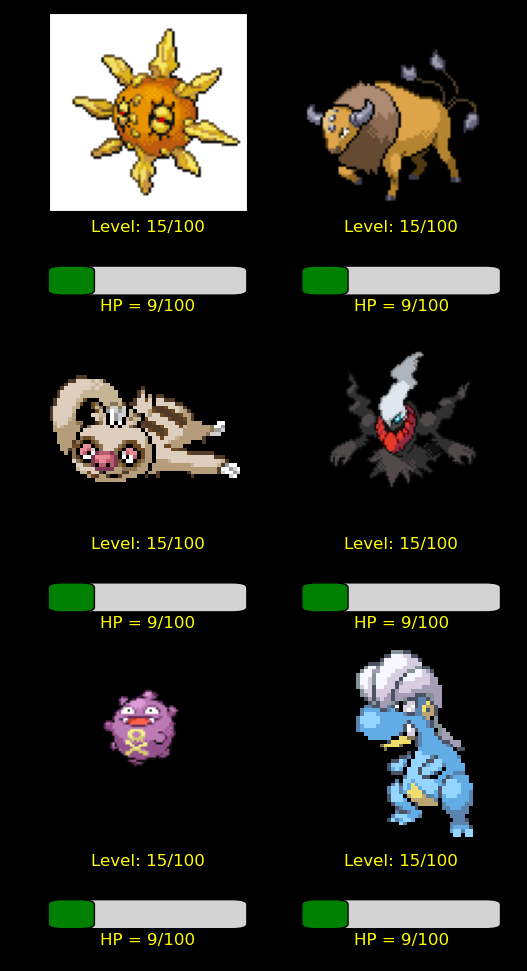

In [99]:
def plot_team(entry_stats, ax = None):
        
    fig = plt.figure(figsize=(6, 12))
    fig.patch.set_facecolor("black")
    gs = GridSpec(6, 2, width_ratios=[1, 1], height_ratios=[0.3, 0.1, 0.3, 0.1, 0.3, 0.1])

    for i, nid in enumerate(nids):
        j, k = i//2, i % 2
        ax = fig.add_subplot(gs[2*j, k])
        impath = PATH_ANIM+str(nid).zfill(3)+'.png'
        anim = imread(impath)

        nframe = 1
        img = anim[:, anim.shape[0] * nframe: anim.shape[0] * (nframe+1) , :]        
        ax.imshow(img)
        # axim.set(xlabel=f'Translate: {question}',)
        ax.xaxis.label.set_color('yellow')
        ax.xaxis.label.set_fontsize(26)

        hp = entry_stats['hp']
        level = entry_stats['level']
        axbar = fig.add_subplot(gs[2*j+1, k])
        axbar.set_facecolor("black")
        axbar.set_xlim(0, 1)
        axbar.set_ylim(0, 1)

        draw_rounded_bar(axbar, width=0.8, color='lightgray', y_offset=0.2, bar_height=0.3)
        draw_rounded_bar(axbar, width=hp * 0.8, color='green', y_offset=0.2, bar_height=0.3)
        axbar.text(0.5, -0.1, f'Level: {level}/100', size=12, ha='center', color='yellow', transform=ax.transAxes)
        axbar.text(0.5, -0.5, f'HP = {int(hp * 100)}/100', size=12, ha='center', color='yellow', transform=ax.transAxes)

    
